# BASELINE

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Load dataset
df = pd.read_excel("CleanData/scaled_data.xlsx")  # Replace with actual file path

In [3]:
# Compute Energy Demand as sum of relevant columns
df["Energy Demand (kW)"] = df[
    ["Computer - kWatts", "Plug Load (kWatts)", "Air Conditioner-kWatts", "light + fan - kWatts "]
].sum(axis=1)

# Scale Energy Demand using Min-Max Scaling
scaler = MinMaxScaler(feature_range=(-1, 1))
df["Energy Demand"] = scaler.fit_transform(df[["Energy Demand (kW)"]])

In [4]:
# Compute correlation with Energy Demand
correlation_threshold = 0.3
target = "Energy Demand"  # Adjust this based on your dataset
dfn = df[["testo 160 IAQ_51616142 [ppm]", "testo 160 IAQ_51616142 [°C]", "testo 160 IAQ_51616142 [mbar]",
         "testo 160 IAQ_51616142 [%RH]", "testo 160 IAQ_51616142 [°C td]", "testo 160 IAQ_51616142 [g/m³]", "Energy Demand"]]

corr_matrix = dfn.corr()
selected_features = corr_matrix[target][abs(corr_matrix[target]) > correlation_threshold].index.tolist()
selected_features.remove(target)  # Remove target itself

In [5]:
# Remove highly correlated features using VIF
X = dfn[selected_features]
X = sm.add_constant(X)  # Add intercept for VIF computation

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Keep features with VIF < 5
final_features = vif_data[vif_data["VIF"] < 5]["Feature"].tolist()
final_features = [f for f in final_features if f != "const"]  # Remove intercept if present

# Prepare final dataset
X = dfn[final_features]
y = dfn[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Baseline prediction: mean of training target values
y_mean_pred = np.full_like(y_test, y_train.mean())

# Compute RMSE
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_mean_pred))
print(f"Baseline RMSE (Mean Prediction): {rmse_baseline:.3f}")

Baseline RMSE (Mean Prediction): 0.308


Baseline RMSE (Mean Prediction): 0.308

# LINEAR MODEL

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler



In [8]:

# Load dataset
df = pd.read_excel("CleanData/scaled_data.xlsx")  # Replace with actual file path



In [9]:
for col in df.columns:
    print(col)

testo 160 IAQ_51616135_outdoor [ppm]
testo 160 IAQ_51616135_outdoor [°C]
testo 160 IAQ_51616135_outdoor [mbar]
testo 160 IAQ_51616135_outdoor [%RH]
testo 160 IAQ_51616135_outdoor [°C td]
testo 160 IAQ_51616135_outdoor [g/m³]
DateTime
testo 160 IAQ_51616142 [ppm]
testo 160 IAQ_51616142 [°C]
testo 160 IAQ_51616142 [mbar]
testo 160 IAQ_51616142 [%RH]
testo 160 IAQ_51616142 [°C td]
testo 160 IAQ_51616142 [g/m³]
Computer - kWatts
Plug Load (kWatts)
Air Conditioner-kWatts
light + fan - kWatts 


In [10]:
# Compute Energy Demand as sum of relevant columns
df["Energy Demand (kW)"] = df[
    ["Computer - kWatts", "Plug Load (kWatts)", "Air Conditioner-kWatts", "light + fan - kWatts "]
].sum(axis=1)

# Scale Energy Demand using Min-Max Scaling
scaler = MinMaxScaler(feature_range=(-1, 1))
df["Energy Demand"] = scaler.fit_transform(df[["Energy Demand (kW)"]])

In [11]:
df

,testo 160 IAQ_51616135_outdoor [ppm],testo 160 IAQ_51616135_outdoor [°C],testo 160 IAQ_51616135_outdoor [mbar],testo 160 IAQ_51616135_outdoor [%RH],testo 160 IAQ_51616135_outdoor [°C td],testo 160 IAQ_51616135_outdoor [g/m³],DateTime,testo 160 IAQ_51616142 [ppm],testo 160 IAQ_51616142 [°C],testo 160 IAQ_51616142 [mbar],testo 160 IAQ_51616142 [%RH],testo 160 IAQ_51616142 [°C td],testo 160 IAQ_51616142 [g/m³],Computer - kWatts,Plug Load (kWatts),Air Conditioner-kWatts,light + fan - kWatts,Energy Demand (kW),Energy Demand
0,0.014164,-0.032,0.407407,-0.029412,-0.232323,-0.437186,2023-03-07 00:00:00,-0.860390,0.276836,0.481481,-0.387033,-0.191011,-0.417143,-1.000000,-1.0,-1.0,-1.0,-4.000000,-1.000000
1,0.002833,-0.040,0.407407,-0.045455,-0.262626,-0.467337,2023-03-07 00:15:00,-0.860390,0.265537,0.481481,-0.383104,-0.191011,-0.417143,-1.000000,-1.0,-1.0,-1.0,-4.000000,-1.000000
2,0.025496,-0.048,0.407407,-0.021390,-0.242424,-0.447236,2023-03-07 00:30:00,-0.853896,0.265537,0.481481,-0.383104,-0.191011,-0.417143,-1.000000,-1.0,-1.0,-1.0,-4.000000,-1.000000
3,0.019830,-0.056,0.407407,-0.045455,-0.282828,-0.477387,2023-03-07 00:45:00,-0.857143,0.265537,0.481481,-0.383104,-0.202247,-0.428571,-1.000000,-1.0,-1.0,-1.0,-4.000000,-1.000000
4,0.031161,-0.056,0.407407,-0.072193,-0.303030,-0.497487,2023-03-07 01:00:00,-0.863636,0.254237,0.481481,-0.390963,-0.202247,-0.428571,-1.000000,-1.0,-1.0,-1.0,-4.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15609,-0.869688,-0.696,0.629630,0.716578,-0.373737,-0.517588,2024-01-01 22:45:00,-0.930195,-0.694915,0.629630,0.520629,-0.382022,-0.542857,-0.731771,-1.0,-1.0,-1.0,-3.731771,-0.874729
15610,-0.830028,-0.696,0.629630,0.716578,-0.373737,-0.517588,2024-01-01 23:00:00,-0.939935,-0.694915,0.629630,0.524558,-0.382022,-0.542857,-0.730469,-1.0,-1.0,-1.0,-3.730469,-0.874121
15611,-0.801700,-0.704,0.629630,0.724599,-0.383838,-0.527638,2024-01-01 23:15:00,-0.926948,-0.694915,0.629630,0.524558,-0.382022,-0.542857,-0.733073,-1.0,-1.0,-1.0,-3.733073,-0.875337
15612,-0.796034,-0.704,0.629630,0.732620,-0.373737,-0.517588,2024-01-01 23:30:00,-0.926948,-0.694915,0.629630,0.524558,-0.382022,-0.542857,-0.731771,-1.0,-1.0,-1.0,-3.731771,-0.874729


In [12]:
df

,testo 160 IAQ_51616135_outdoor [ppm],testo 160 IAQ_51616135_outdoor [°C],testo 160 IAQ_51616135_outdoor [mbar],testo 160 IAQ_51616135_outdoor [%RH],testo 160 IAQ_51616135_outdoor [°C td],testo 160 IAQ_51616135_outdoor [g/m³],DateTime,testo 160 IAQ_51616142 [ppm],testo 160 IAQ_51616142 [°C],testo 160 IAQ_51616142 [mbar],testo 160 IAQ_51616142 [%RH],testo 160 IAQ_51616142 [°C td],testo 160 IAQ_51616142 [g/m³],Computer - kWatts,Plug Load (kWatts),Air Conditioner-kWatts,light + fan - kWatts,Energy Demand (kW),Energy Demand
0,0.014164,-0.032,0.407407,-0.029412,-0.232323,-0.437186,2023-03-07 00:00:00,-0.860390,0.276836,0.481481,-0.387033,-0.191011,-0.417143,-1.000000,-1.0,-1.0,-1.0,-4.000000,-1.000000
1,0.002833,-0.040,0.407407,-0.045455,-0.262626,-0.467337,2023-03-07 00:15:00,-0.860390,0.265537,0.481481,-0.383104,-0.191011,-0.417143,-1.000000,-1.0,-1.0,-1.0,-4.000000,-1.000000
2,0.025496,-0.048,0.407407,-0.021390,-0.242424,-0.447236,2023-03-07 00:30:00,-0.853896,0.265537,0.481481,-0.383104,-0.191011,-0.417143,-1.000000,-1.0,-1.0,-1.0,-4.000000,-1.000000
3,0.019830,-0.056,0.407407,-0.045455,-0.282828,-0.477387,2023-03-07 00:45:00,-0.857143,0.265537,0.481481,-0.383104,-0.202247,-0.428571,-1.000000,-1.0,-1.0,-1.0,-4.000000,-1.000000
4,0.031161,-0.056,0.407407,-0.072193,-0.303030,-0.497487,2023-03-07 01:00:00,-0.863636,0.254237,0.481481,-0.390963,-0.202247,-0.428571,-1.000000,-1.0,-1.0,-1.0,-4.000000,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15609,-0.869688,-0.696,0.629630,0.716578,-0.373737,-0.517588,2024-01-01 22:45:00,-0.930195,-0.694915,0.629630,0.520629,-0.382022,-0.542857,-0.731771,-1.0,-1.0,-1.0,-3.731771,-0.874729
15610,-0.830028,-0.696,0.629630,0.716578,-0.373737,-0.517588,2024-01-01 23:00:00,-0.939935,-0.694915,0.629630,0.524558,-0.382022,-0.542857,-0.730469,-1.0,-1.0,-1.0,-3.730469,-0.874121
15611,-0.801700,-0.704,0.629630,0.724599,-0.383838,-0.527638,2024-01-01 23:15:00,-0.926948,-0.694915,0.629630,0.524558,-0.382022,-0.542857,-0.733073,-1.0,-1.0,-1.0,-3.733073,-0.875337
15612,-0.796034,-0.704,0.629630,0.732620,-0.373737,-0.517588,2024-01-01 23:30:00,-0.926948,-0.694915,0.629630,0.524558,-0.382022,-0.542857,-0.731771,-1.0,-1.0,-1.0,-3.731771,-0.874729


In [13]:
# Compute correlation with Energy Demand
correlation_threshold = 0.3
target = "Energy Demand"  # Adjust this based on your dataset
dfn = df[["testo 160 IAQ_51616142 [ppm]", "testo 160 IAQ_51616142 [°C]", "testo 160 IAQ_51616142 [mbar]",
         "testo 160 IAQ_51616142 [%RH]", "testo 160 IAQ_51616142 [°C td]", "testo 160 IAQ_51616142 [g/m³]", "Energy Demand"]]

corr_matrix = dfn.corr()
selected_features = corr_matrix[target][abs(corr_matrix[target]) > correlation_threshold].index.tolist()
selected_features.remove(target)  # Remove target itself



In [14]:
selected_features

['testo 160 IAQ_51616142 [ppm]']

In [15]:
# Remove highly correlated features using VIF
X = dfn[selected_features]
X = sm.add_constant(X)  # Add intercept for VIF computation

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Keep features with VIF < 5
final_features = vif_data[vif_data["VIF"] < 5]["Feature"].tolist()
final_features = [f for f in final_features if f != "const"]  # Remove intercept if present

# Prepare final dataset
X = dfn[final_features]
y = dfn[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate Model
r2_score = model.score(X_test, y_test)
print(f"R² Score: {r2_score:.3f}")
print(f"Selected Features: {final_features}")

R² Score: 0.107
Selected Features: ['testo 160 IAQ_51616142 [ppm]']


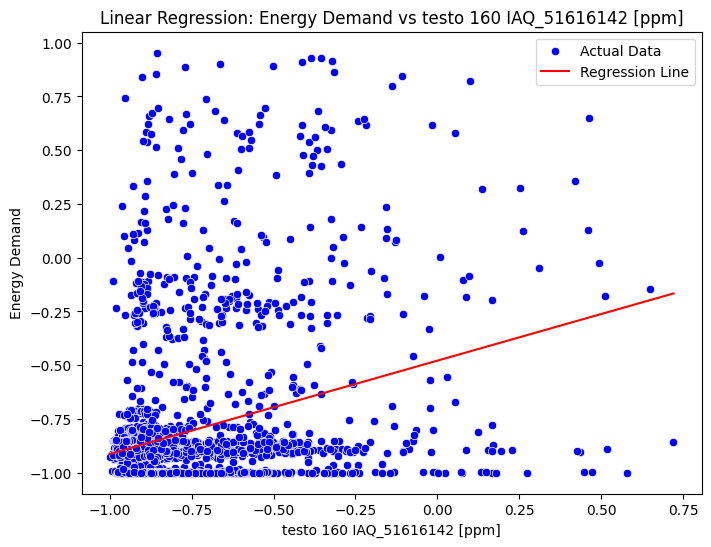

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predictions using the model
y_pred = model.predict(X_test)

# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test["testo 160 IAQ_51616142 [ppm]"], y=y_test, label="Actual Data", color='blue')
sns.lineplot(x=X_test["testo 160 IAQ_51616142 [ppm]"], y=y_pred, color='red', label="Regression Line")

plt.xlabel("testo 160 IAQ_51616142 [ppm]")
plt.ylabel("Energy Demand")
plt.title("Linear Regression: Energy Demand vs testo 160 IAQ_51616142 [ppm]")
plt.legend()
plt.show()


In [17]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Predict on test data
y_pred = model.predict(X_test)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")

RMSE: 0.291


LINEAR MODEL RMSE : 0.291

# TIME SERIES

In [18]:
import matplotlib.pyplot as plt

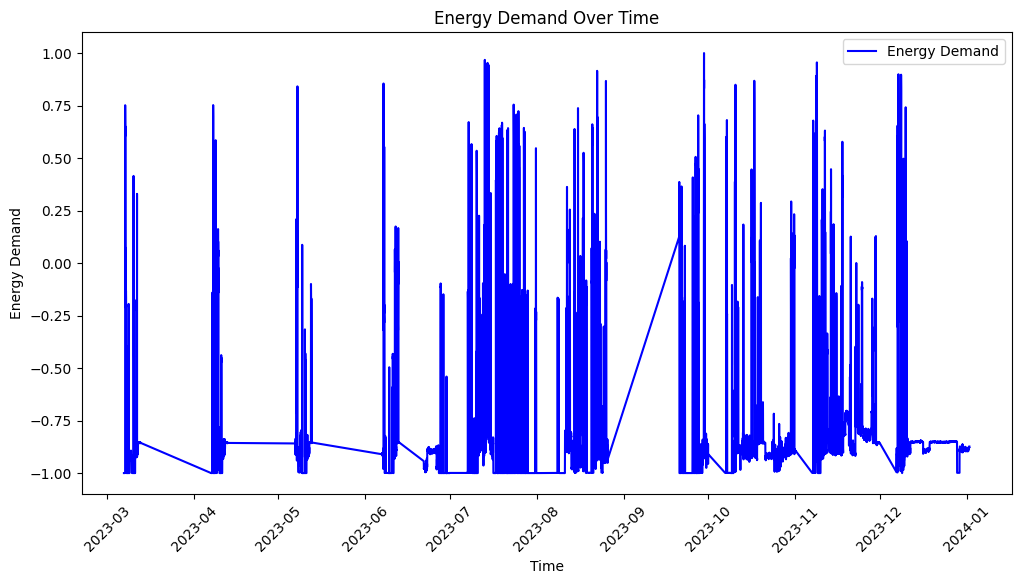

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(df["DateTime"], df["Energy Demand"], label="Energy Demand", color="blue")
plt.xlabel("Time")
plt.ylabel("Energy Demand")
plt.title("Energy Demand Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [20]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df["Energy Demand"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -19.65272513063004
p-value: 0.0


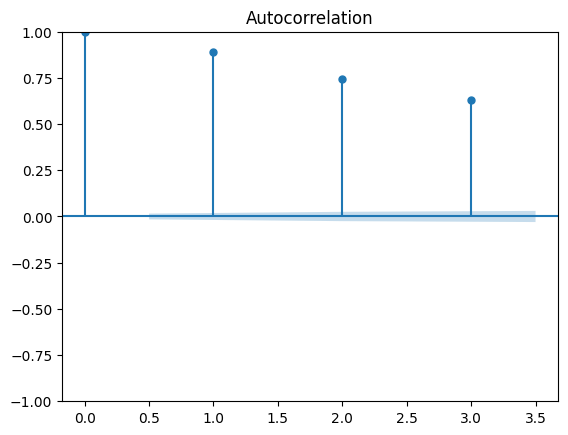

In [21]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df["Energy Demand"], lags=3)  # Adjust lags based on dataset
plt.show()

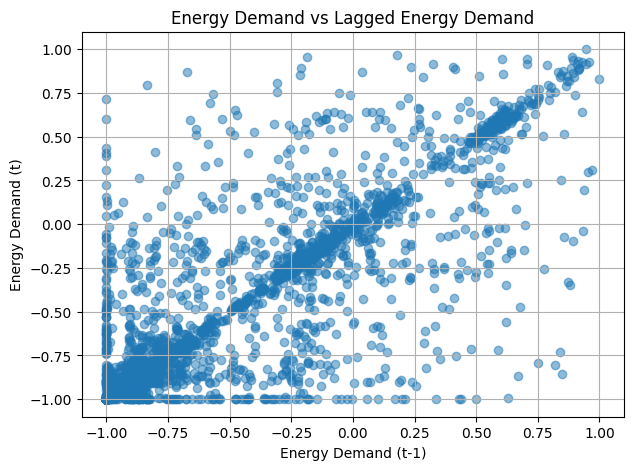

In [22]:
import matplotlib.pyplot as plt

# Create lagged feature
df["Energy Demand Lagged"] = df["Energy Demand"].shift(1)

# Scatter plot
plt.figure(figsize=(7,5))
plt.scatter(df["Energy Demand Lagged"], df["Energy Demand"], alpha=0.5)
plt.xlabel("Energy Demand (t-1)")
plt.ylabel("Energy Demand (t)")
plt.title("Energy Demand vs Lagged Energy Demand")
plt.grid(True)
plt.show()

In [23]:
print(df["Energy Demand"].autocorr(lag=1))


0.8924253592219717


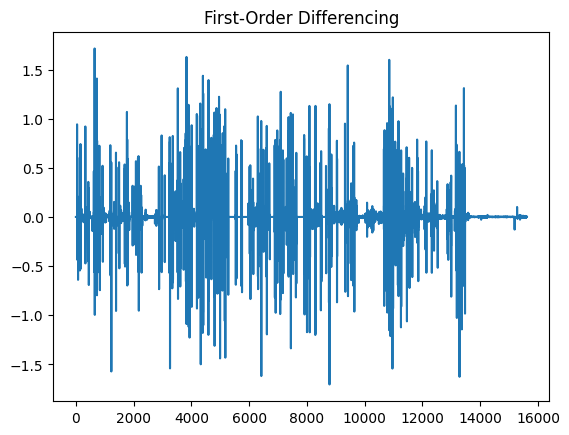

In [24]:
df["Energy Demand Diff1"] = df["Energy Demand"].diff()
df["Energy Demand Diff1"].dropna().plot(title="First-Order Differencing")
plt.show()


In [25]:


result = adfuller(df["Energy Demand Diff1"].dropna())
print(f"ADF Statistic diff1: {result[0]}")
print(f"p-value diff1: {result[1]}")

ADF Statistic diff1: -26.345225736210057
p-value diff1: 0.0


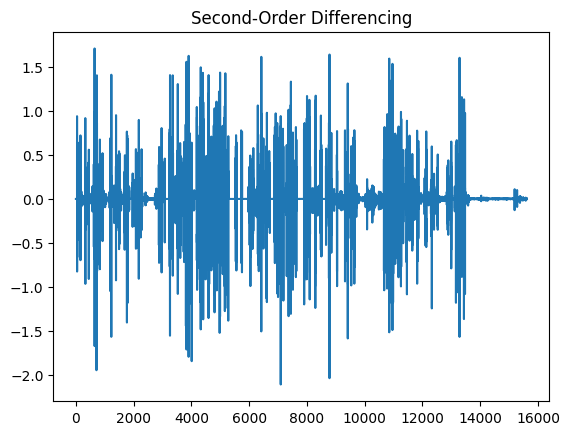

In [26]:
df["Energy Demand Diff2"] = df["Energy Demand"].diff().diff()
df["Energy Demand Diff2"].dropna().plot(title="Second-Order Differencing")
plt.show()


In [27]:

result = adfuller(df["Energy Demand Diff2"].dropna())
print(f"ADF Statistic diff2: {result[0]}")
print(f"p-value diff2: {result[1]}")

ADF Statistic diff2: -35.41334748667275
p-value diff2: 0.0


In [28]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Assume df['Energy Demand'] is your time series data
energy_demand = df['Energy Demand']

# ADF Test
adf_result = adfuller(energy_demand)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

# If p-value < 0.05, data is stationary
if adf_result[1] < 0.05:
    print("Data is stationary. Proceeding with ARMA modeling.")
else:
    print("Data is non-stationary. Differencing might be needed.")


ADF Statistic: -19.65272513063004
p-value: 0.0
Data is stationary. Proceeding with ARMA modeling.


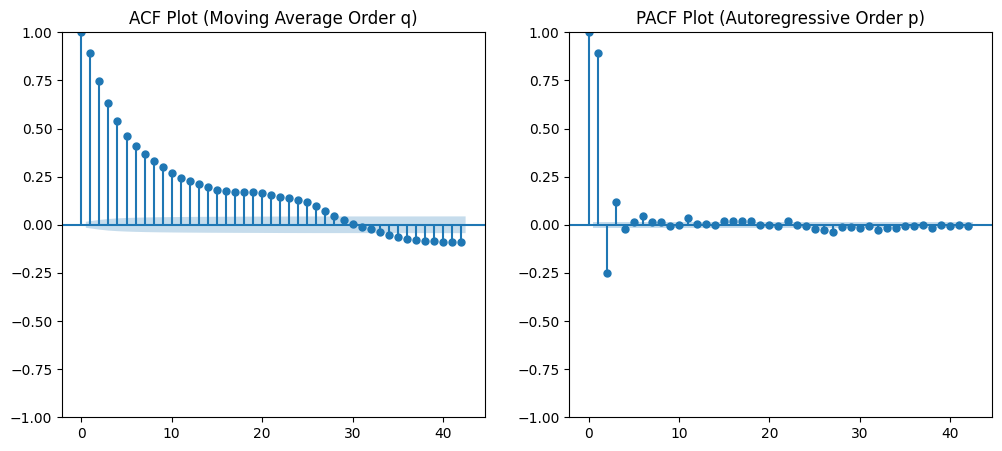

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ACF (Autocorrelation)
plot_acf(energy_demand, ax=axes[0])
axes[0].set_title("ACF Plot (Moving Average Order q)")

# PACF (Partial Autocorrelation)
plot_pacf(energy_demand, ax=axes[1])
axes[1].set_title("PACF Plot (Autoregressive Order p)")

plt.show()


                               SARIMAX Results                                
Dep. Variable:          Energy Demand   No. Observations:                15614
Model:                 ARIMA(1, 0, 1)   Log Likelihood                9952.658
Date:                Fri, 02 May 2025   AIC                         -19897.315
Time:                        18:17:08   BIC                         -19866.691
Sample:                             0   HQIC                        -19887.175
                              - 15614                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8305      0.016    -53.055      0.000      -0.861      -0.800
ar.L1          0.8305      0.004    219.559      0.000       0.823       0.838
ma.L1          0.3264      0.004     89.724      0.0

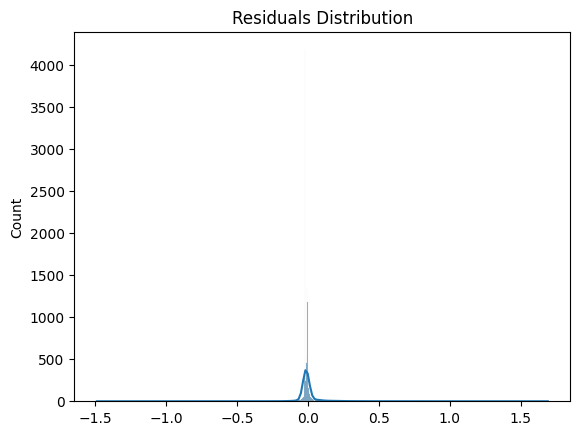

In [30]:
from statsmodels.tsa.arima.model import ARIMA

# Choose p and q based on ACF/PACF
p, d, q = 1, 0, 1  # Adjust based on plots

# Fit ARMA Model
arima_model = ARIMA(energy_demand, order=(p, d, q))
arma_result = arima_model.fit()

# Print summary
print(arma_result.summary())

# Plot residuals
residuals = arma_result.resid
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()


In [31]:

# Ljung-Box test for autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_results = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test Results:\n", ljung_box_results)

Ljung-Box Test Results:
       lb_stat     lb_pvalue
10  59.750676  4.040059e-09


d:\Program Files\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:          Energy Demand   No. Observations:                15614
Model:                 ARIMA(5, 0, 5)   Log Likelihood                9995.655
Date:                Fri, 02 May 2025   AIC                         -19967.310
Time:                        18:17:32   BIC                         -19875.438
Sample:                             0   HQIC                        -19936.888
                              - 15614                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8304      0.020    -41.272      0.000      -0.870      -0.791
ar.L1          1.7047      0.074     22.928      0.000       1.559       1.850
ar.L2         -1.2185      0.167     -7.313      0.0

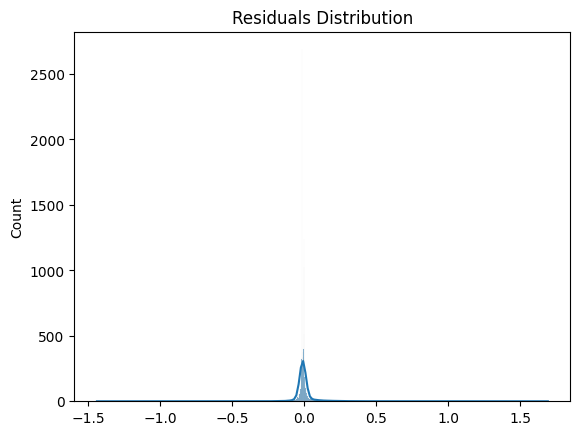

Ljung-Box Test Results:
       lb_stat  lb_pvalue
10  10.628838   0.387156


In [32]:


# Choose p and q based on ACF/PACF
p, d, q = 5, 0, 5  # Adjust based on plots

# Fit ARMA Model
arima_model = ARIMA(energy_demand, order=(p, d, q))
arma_result = arima_model.fit()

# Print summary
print(arma_result.summary())

# Plot residuals
residuals = arma_result.resid
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()


# Ljung-Box test for autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_results = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test Results:\n", ljung_box_results)

d:\Program Files\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


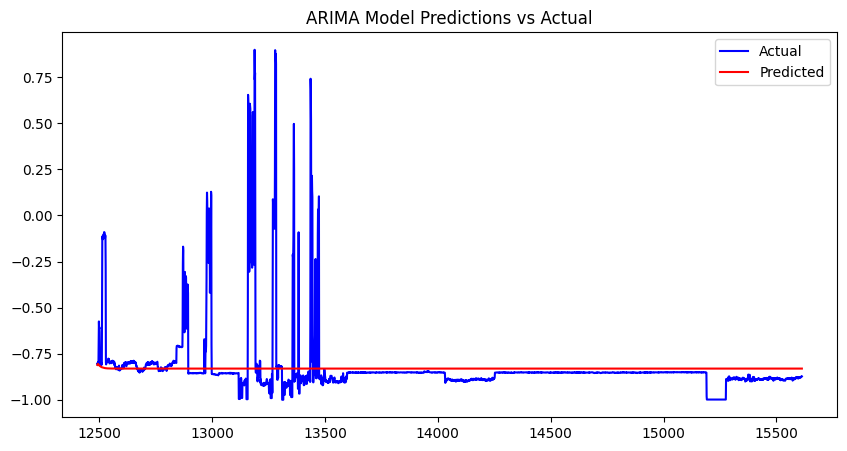

In [33]:
import matplotlib.pyplot as plt

# Generate predictions
train_size = int(len(energy_demand) * 0.8)  # 80% train, 20% test
train, test = energy_demand[:train_size], energy_demand[train_size:]
model = ARIMA(train, order=(5, 0, 5))
arma_result = model.fit()

# Forecast
preds = arma_result.forecast(steps=len(test))

# Plot
plt.figure(figsize=(10, 5))
plt.plot(test.index, test, label="Actual", color="blue")
plt.plot(test.index, preds, label="Predicted", color="red")
plt.title("ARIMA Model Predictions vs Actual")
plt.legend()
plt.show()


In [34]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test, preds))
print(f"RMSE: {rmse}")

# Compute MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((test - preds) / test)) * 100
print(f"MAPE: {mape:.2f}%")


RMSE: 0.19285426435830053
MAPE: 39.60%


ARIMA MODEL RMSE : 0.19

# OCCUPANCY INDICATOR

In [35]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler



In [36]:

# Load dataset
df = pd.read_excel("CleanData/scaled_data.xlsx")  # Replace with actual file path
energy_columns = ["Computer - kWatts", "Plug Load (kWatts)", "Air Conditioner-kWatts", "light + fan - kWatts "]
df['ActiveSources'] = (df[energy_columns] > -1).sum(axis=1)

# Assign occupancy values
occupancy_mapping = {0: 0, 1: 0.25, 2: 0.5, 3: 0.75, 4: 1.0}
df['Occupancy'] = df['ActiveSources'].map(occupancy_mapping)

# Define work hours (8 AM to 6 PM)
df["Hour"] = df["DateTime"].dt.hour
df["WorkHour"] = ((df["Hour"] >= 8) & (df["Hour"] < 18)).astype(int)  # 1 for work hours, 0 otherwise

# Drop unnecessary columns
df = df.drop(columns=['Hour', 'ActiveSources'])


In [37]:
df.to_excel("CleanData/occupancy_data.xlsx", index=False)

# OCCUPANCY DATA

In [38]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

#VISUAL
import matplotlib.pyplot as plt
import seaborn as sns



In [39]:
df = pd.read_excel("CleanData/occupancy_data.xlsx")  # Replace with actual file path

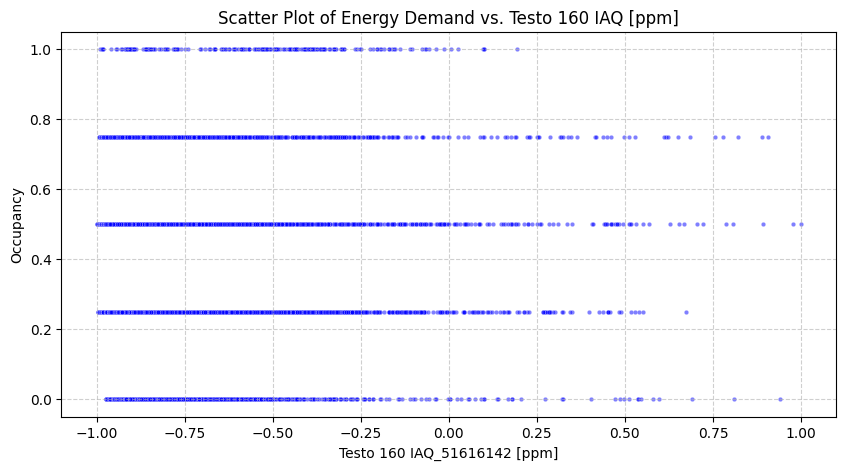

In [40]:

# Scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["testo 160 IAQ_51616142 [ppm]"], y=df["Occupancy"], color='b', alpha=0.5, s=10)
plt.xlabel("Testo 160 IAQ_51616142 [ppm]")
plt.ylabel("Occupancy")
plt.title("Scatter Plot of Energy Demand vs. Testo 160 IAQ [ppm]")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


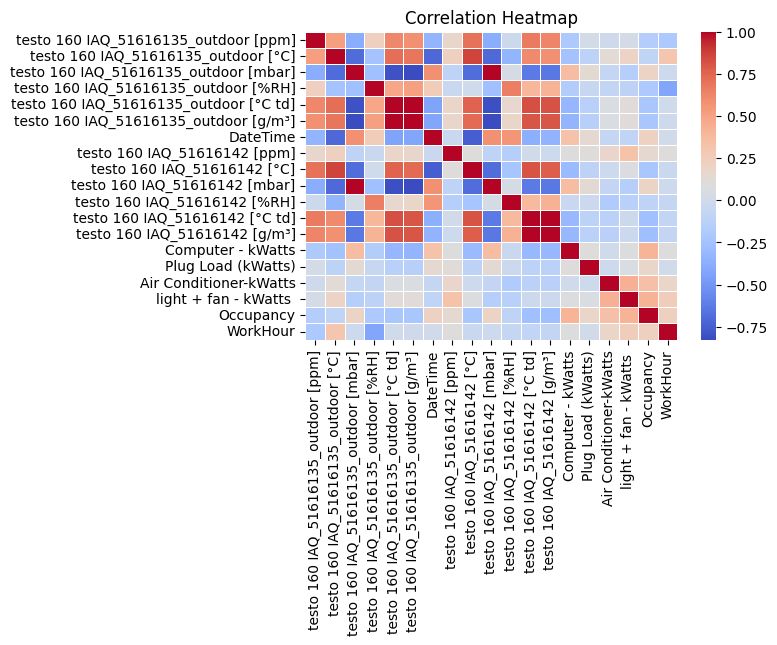

In [41]:
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

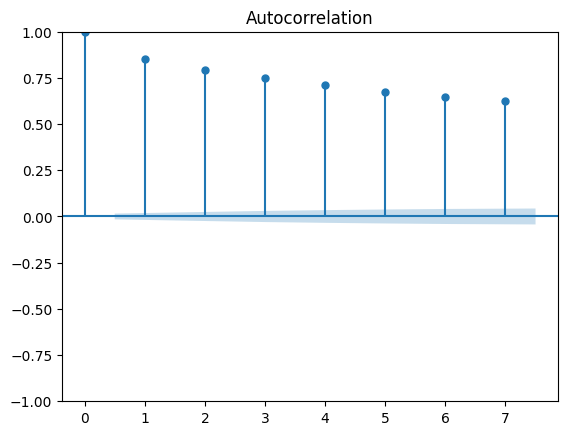

In [42]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df["Occupancy"], lags=7)  # Adjust lags based on dataset
plt.show()

In [43]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df["Occupancy"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -14.003218293783613
p-value: 3.8288405434266974e-26


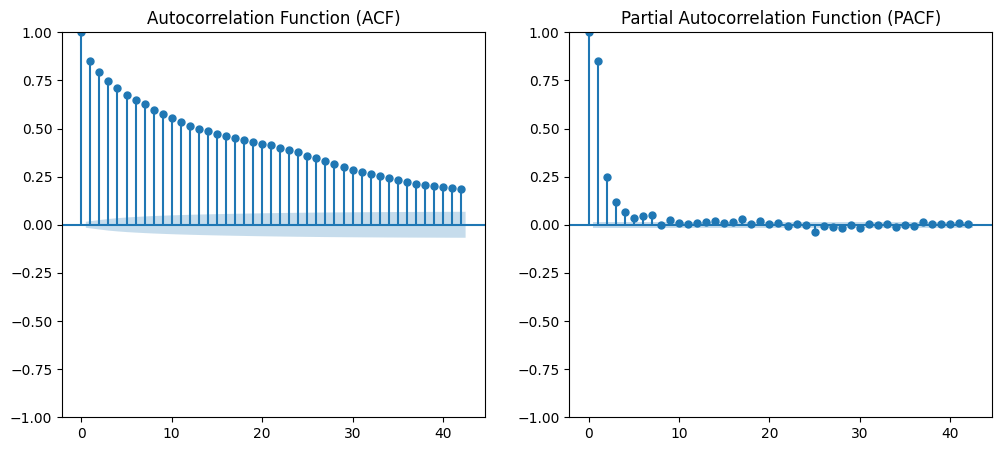

In [44]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(df["Occupancy"], ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(df["Occupancy"], ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()


d:\Program Files\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:              Occupancy   No. Observations:                15614
Model:                 ARIMA(7, 0, 7)   Log Likelihood               11708.588
Date:                Fri, 02 May 2025   AIC                         -23385.177
Time:                        18:18:32   BIC                         -23262.682
Sample:                             0   HQIC                        -23344.614
                              - 15614                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3059      0.019     16.306      0.000       0.269       0.343
ar.L1          0.5105      0.229      2.230      0.026       0.062       0.959
ar.L2          0.5537      0.186      2.971      0.0

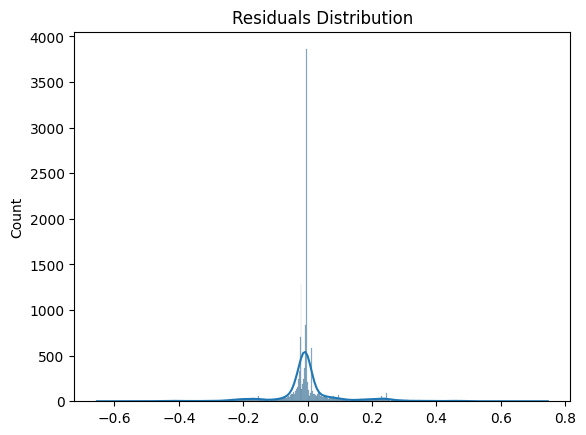

Ljung-Box Test Results:
      lb_stat  lb_pvalue
10  0.928811   0.999877


In [45]:
from statsmodels.tsa.arima.model import ARIMA
# Choose p and q based on ACF/PACF
p, d, q = 7, 0, 7  # Adjust based on plots
occupancy = df["Occupancy"]

# Fit ARMA Model
model = ARIMA(occupancy, order=(p, d, q))
arma_result = model.fit()

# Print summary
print(arma_result.summary())

# Plot residuals
residuals = arma_result.resid
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()


# Ljung-Box test for autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_results = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test Results:\n", ljung_box_results)

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define train-test split (e.g., 80% train, 20% test)
split_ratio = 0.8
split_index = int(len(occupancy) * split_ratio)

train_data = occupancy[:split_index]
test_data = occupancy[split_index:]

# Fit ARIMA model on training data
model = ARIMA(train_data, order=(p, d, q))
arma_result = model.fit()

# Generate predictions for the test set
forecast = arma_result.predict(start=split_index, end=len(occupancy) - 1)

# Calculate error metrics
mae = mean_absolute_error(test_data, forecast)
rmse = np.sqrt(mean_squared_error(test_data, forecast))
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100  # Mean Absolute Percentage Error

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


d:\Program Files\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Mean Absolute Error (MAE): 0.1530109867505602
Root Mean Squared Error (RMSE): 0.21740815958982268
Mean Absolute Percentage Error (MAPE): inf%


Mean Absolute Error (MAE): 0.1530109867505602
Root Mean Squared Error (RMSE): 0.21740815958982268
Mean Absolute Percentage Error (MAPE): 29.25%
Forecast Accuracy: 70.75%


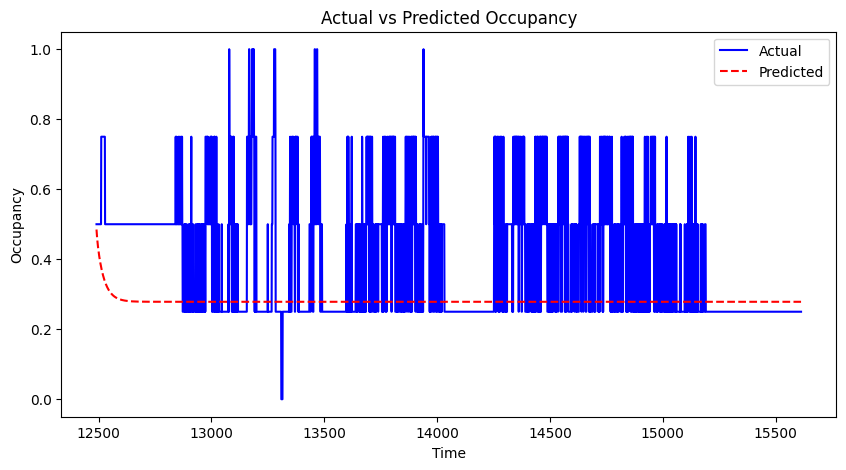

In [47]:
import matplotlib.pyplot as plt

# Avoid division by zero in MAPE
nonzero_mask = test_data != 0
mape = np.mean(np.abs((test_data[nonzero_mask] - forecast[nonzero_mask]) / test_data[nonzero_mask])) * 100
accuracy = 100 - mape  # Accuracy as (100 - MAPE)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Forecast Accuracy: {accuracy:.2f}%")

# Plot actual vs predicted values
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label="Actual", color="blue")
plt.plot(test_data.index, forecast, label="Predicted", color="red", linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Occupancy")
plt.title("Actual vs Predicted Occupancy")
plt.legend()
plt.show()


# CLUSTERING

In [48]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
#VISUAL
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_excel("CleanData/scaled_data.xlsx")  # Replace with actual file path

In [50]:
df.columns

Index(['testo 160 IAQ_51616135_outdoor [ppm]',
       'testo 160 IAQ_51616135_outdoor [°C]',
       'testo 160 IAQ_51616135_outdoor [mbar]',
       'testo 160 IAQ_51616135_outdoor [%RH]',
       'testo 160 IAQ_51616135_outdoor [°C td]',
       'testo 160 IAQ_51616135_outdoor [g/m³]', 'DateTime',
       'testo 160 IAQ_51616142 [ppm]', 'testo 160 IAQ_51616142 [°C]',
       'testo 160 IAQ_51616142 [mbar]', 'testo 160 IAQ_51616142 [%RH]',
       'testo 160 IAQ_51616142 [°C td]', 'testo 160 IAQ_51616142 [g/m³]',
       'Computer - kWatts', 'Plug Load (kWatts)', 'Air Conditioner-kWatts',
       'light + fan - kWatts '],
      dtype='object')

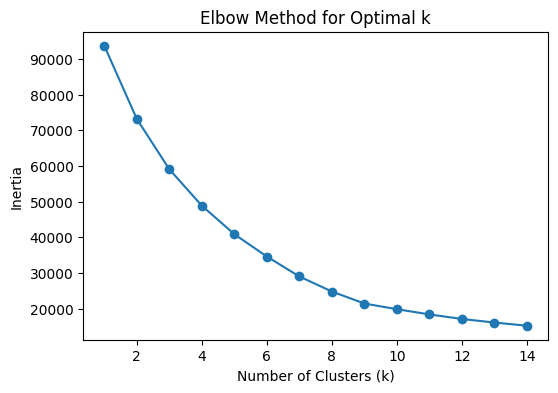

In [51]:




# Select relevant features
features = [
    'testo 160 IAQ_51616142 [ppm]',  # CO2 concentration
    'testo 160 IAQ_51616142 [°C]',   # Temperature
    'Computer - kWatts', 
    'Plug Load (kWatts)', 
    'Air Conditioner-kWatts', 
    'light + fan - kWatts '
]
df_selected = df[features].dropna()

# Standardize data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_selected)

# ---- K-MEANS CLUSTERING ---- #
# Find optimal k using Elbow method
inertia = []
K_range = range(1, 15)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow method
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


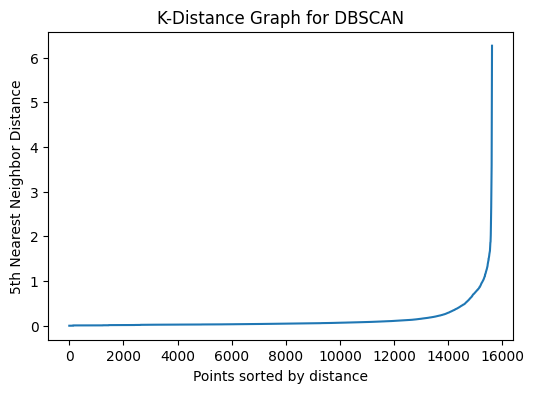

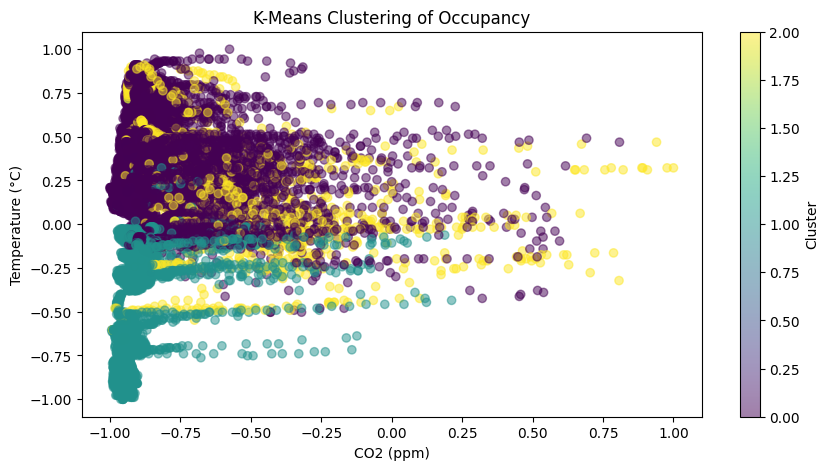

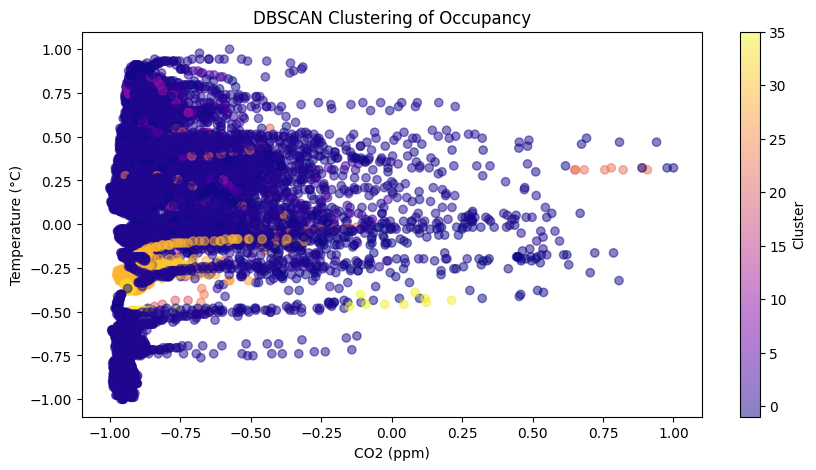

In [52]:

# Apply K-Means with best k (choose manually from elbow plot)
best_k = 3  # Adjust based on elbow method
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(data_scaled)

# ---- DBSCAN CLUSTERING ---- #
# Find optimal eps using k-distance plot
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(data_scaled)
distances, indices = nbrs.kneighbors(data_scaled)
distances = np.sort(distances[:, -1])

# Plot k-distance graph
plt.figure(figsize=(6, 4))
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.title("K-Distance Graph for DBSCAN")
plt.show()

# Apply DBSCAN (adjust eps & min_samples based on k-distance plot)
dbscan = DBSCAN(eps=0.5, min_samples=5)
df["DBSCAN_Cluster"] = dbscan.fit_predict(data_scaled)

# ---- VISUALIZATION ---- #
plt.figure(figsize=(10, 5))
plt.scatter(df_selected.iloc[:, 0], df_selected.iloc[:, 1], c=df["KMeans_Cluster"], cmap="viridis", alpha=0.5)
plt.xlabel("CO2 (ppm)")
plt.ylabel("Temperature (°C)")
plt.title("K-Means Clustering of Occupancy")
plt.colorbar(label="Cluster")
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(df_selected.iloc[:, 0], df_selected.iloc[:, 1], c=df["DBSCAN_Cluster"], cmap="plasma", alpha=0.5)
plt.xlabel("CO2 (ppm)")
plt.ylabel("Temperature (°C)")
plt.title("DBSCAN Clustering of Occupancy")
plt.colorbar(label="Cluster")
plt.show()


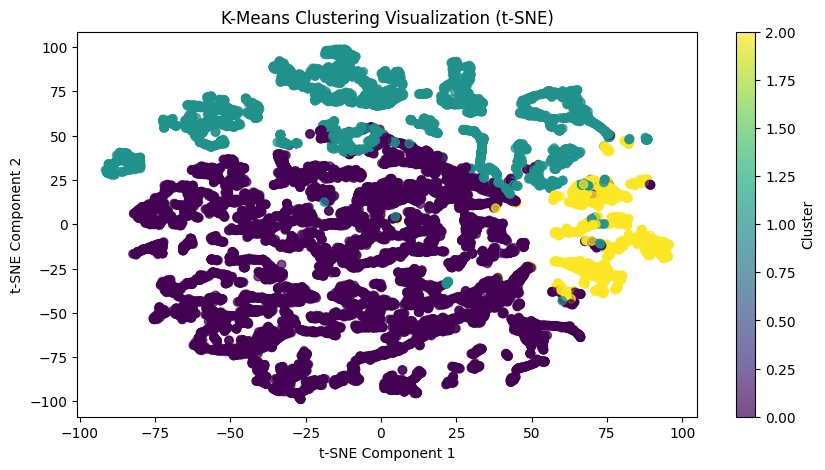

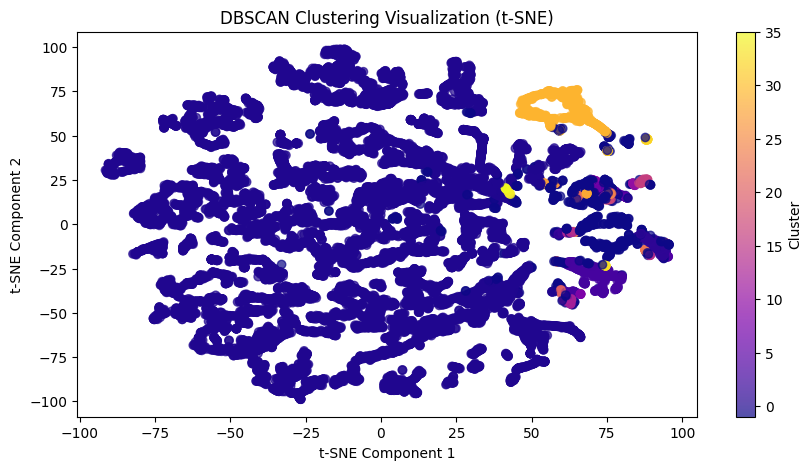

In [53]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
tsne_results = tsne.fit_transform(data_scaled)

# Add t-SNE results to dataframe
df["TSNE_1"] = tsne_results[:, 0]
df["TSNE_2"] = tsne_results[:, 1]

# Plot K-Means Clusters
plt.figure(figsize=(10, 5))
plt.scatter(df["TSNE_1"], df["TSNE_2"], c=df["KMeans_Cluster"], cmap="viridis", alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("K-Means Clustering Visualization (t-SNE)")
plt.colorbar(label="Cluster")
plt.show()

# Plot DBSCAN Clusters
plt.figure(figsize=(10, 5))
plt.scatter(df["TSNE_1"], df["TSNE_2"], c=df["DBSCAN_Cluster"], cmap="plasma", alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("DBSCAN Clustering Visualization (t-SNE)")
plt.colorbar(label="Cluster")
plt.show()


In [54]:
cluster_ranges = df.groupby("KMeans_Cluster").agg(["min", "max"])
print(cluster_ranges)


               testo 160 IAQ_51616135_outdoor [ppm]            \
                                                min       max   
KMeans_Cluster                                                  
0                                         -0.558074  1.000000   
1                                         -1.000000  0.756374   
2                                         -0.580737  0.841360   

               testo 160 IAQ_51616135_outdoor [°C]         \
                                               min    max   
KMeans_Cluster                                              
0                                           -0.456  1.000   
1                                           -1.000  0.688   
2                                           -0.672  0.976   

               testo 160 IAQ_51616135_outdoor [mbar]            \
                                                 min       max   
KMeans_Cluster                                                   
0                                          -

In [55]:
df["Working_Hours"] = df["DateTime"].dt.hour.between(8, 18).astype(int)


In [56]:
cluster_counts = df.groupby(["KMeans_Cluster", "Working_Hours"]).size().unstack()
print(cluster_counts)


Working_Hours      0     1
KMeans_Cluster            
0               6274  4101
1               2118  1810
2                 91  1220


# BAGGING

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# 

In [58]:
df = pd.read_excel("CleanData/scaled_data.xlsx")  # Replace with actual file path

In [59]:
# Compute Energy Demand as sum of relevant columns
df["Energy Demand (kW)"] = df[
    ["Computer - kWatts", "Plug Load (kWatts)", "Air Conditioner-kWatts", "light + fan - kWatts "]
].sum(axis=1)

# Scale Energy Demand using Min-Max Scaling
scaler = MinMaxScaler(feature_range=(-1, 1))
df["Energy Demand"] = scaler.fit_transform(df[["Energy Demand (kW)"]])

In [60]:
correlation_threshold = 0.1
target = "Energy Demand"  # Adjust this based on your dataset
dfn = df[["testo 160 IAQ_51616142 [ppm]", "testo 160 IAQ_51616142 [°C]", "testo 160 IAQ_51616142 [mbar]",
         "testo 160 IAQ_51616142 [%RH]", "testo 160 IAQ_51616142 [°C td]", "testo 160 IAQ_51616142 [g/m³]", "Energy Demand"]]

corr_matrix = dfn.corr()
selected_features = corr_matrix[target][abs(corr_matrix[target]) > correlation_threshold].index.tolist()
selected_features.remove(target)  # Remove target itself

In [61]:
selected_features

['testo 160 IAQ_51616142 [ppm]',
 'testo 160 IAQ_51616142 [%RH]',
 'testo 160 IAQ_51616142 [°C td]',
 'testo 160 IAQ_51616142 [g/m³]']

In [62]:


# Remove highly correlated features using VIF
X = dfn[selected_features]
X = sm.add_constant(X)  # Add intercept for VIF computation

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Keep features with VIF < 5
final_features = vif_data[vif_data["VIF"] < 5]["Feature"].tolist()
final_features = [f for f in final_features if f != "const"]  # Remove intercept if present

# Prepare final dataset
X = dfn[final_features]
y = dfn[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Bagging Regressor with Linear Regression Base Model
base_model = LinearRegression()
bagging_model = BaggingRegressor(base_model, n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = bagging_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Selected Features: {final_features}")
print(f"Bagging RMSE: {rmse:.3f}")


Selected Features: ['testo 160 IAQ_51616142 [ppm]', 'testo 160 IAQ_51616142 [%RH]']
Bagging RMSE: 0.289


Bagging RMSE: 0.289

# BOOSTING

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm


In [64]:
df = pd.read_excel("CleanData/scaled_data.xlsx")  # Replace with actual file path

In [65]:
# Compute Energy Demand as sum of relevant columns
df["Energy Demand (kW)"] = df[
    ["Computer - kWatts", "Plug Load (kWatts)", "Air Conditioner-kWatts", "light + fan - kWatts "]
].sum(axis=1)

# Scale Energy Demand using Min-Max Scaling
scaler = MinMaxScaler(feature_range=(-1, 1))
df["Energy Demand"] = scaler.fit_transform(df[["Energy Demand (kW)"]])

In [66]:
correlation_threshold = 0.1
target = "Energy Demand"  # Adjust this based on your dataset
dfn = df[["testo 160 IAQ_51616142 [ppm]", "testo 160 IAQ_51616142 [°C]", "testo 160 IAQ_51616142 [mbar]",
         "testo 160 IAQ_51616142 [%RH]", "testo 160 IAQ_51616142 [°C td]", "testo 160 IAQ_51616142 [g/m³]", "Energy Demand"]]

corr_matrix = dfn.corr()
selected_features = corr_matrix[target][abs(corr_matrix[target]) > correlation_threshold].index.tolist()
selected_features.remove(target)  # Remove target itself

In [67]:
selected_features

['testo 160 IAQ_51616142 [ppm]',
 'testo 160 IAQ_51616142 [%RH]',
 'testo 160 IAQ_51616142 [°C td]',
 'testo 160 IAQ_51616142 [g/m³]']

In [68]:

# Remove highly correlated features using VIF
X = dfn[selected_features]
X = sm.add_constant(X)  # Add intercept for VIF computation

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Keep features with VIF < 5
final_features = vif_data[vif_data["VIF"] < 5]["Feature"].tolist()
final_features = [f for f in final_features if f != "const"]  # Remove intercept if present



In [69]:
final_features

['testo 160 IAQ_51616142 [ppm]', 'testo 160 IAQ_51616142 [%RH]']

In [70]:
# Clean feature names
X = dfn[final_features].copy()
X.columns = [col.replace(" ", "_").replace("[", "").replace("]", "").replace("%", "percent") for col in X.columns]


y = dfn[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Boosting Model (XGBoost)
boosting_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42,gamma =  0.15 )
boosting_model.fit(X_train, y_train)

# Predict & Evaluate
y_pred = boosting_model.predict(X_test)
rmse_boosting = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Selected Features: {final_features}")
print(f"Boosting RMSE: {rmse_boosting:.3f}")

Selected Features: ['testo 160 IAQ_51616142 [ppm]', 'testo 160 IAQ_51616142 [%RH]']
Boosting RMSE: 0.275


Boosting RMSE: 0.273 (n=100, l=0.1, m=5)

d:\Program Files\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-05-02 18:19:57,252] A new study created in memory with name: no-name-ca42145d-7a2d-4b29-8a5a-55d6be74eee0
[I 2025-05-02 18:19:57,279] Trial 0 finished with value: 0.2934205887494013 and parameters: {'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.02245883085809175, 'subsample': 0.712502578826714, 'colsample_bytree': 0.993281363973058, 'gamma': 3.788785405795834, 'reg_lambda': 2.0746730380560874}. Best is trial 0 with value: 0.2934205887494013.
[I 2025-05-02 18:19:57,314] Trial 1 finished with value: 0.2869500680383616 and parameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.06272817469873826, 'subsample': 0.755167866220267, 'colsample_bytree': 0.7624913149354757, 'gamma': 3.743492714098756, 'reg_lambda': 7.469

Best Hyperparameters: {'n_estimators': 400, 'max_depth': 7, 'learning_rate': 0.15482729010344792, 'subsample': 0.8665728542170006, 'colsample_bytree': 0.9435375022070078, 'gamma': 0.47839612999973635, 'reg_lambda': 7.739980650617125}


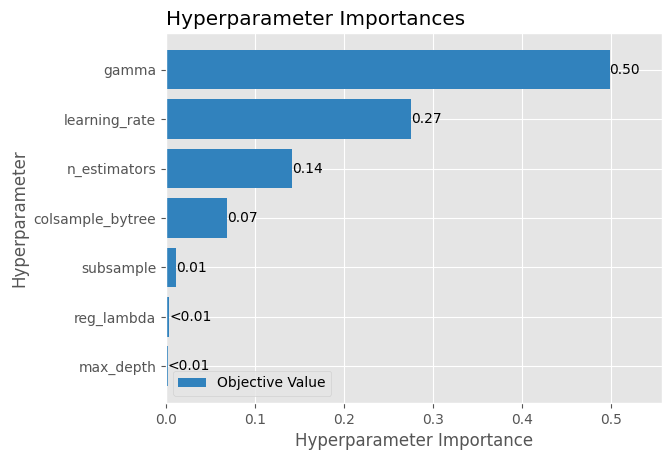

C:\Users\Prakhar\AppData\Local\Temp\ipykernel_4228\1877107732.py:41: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


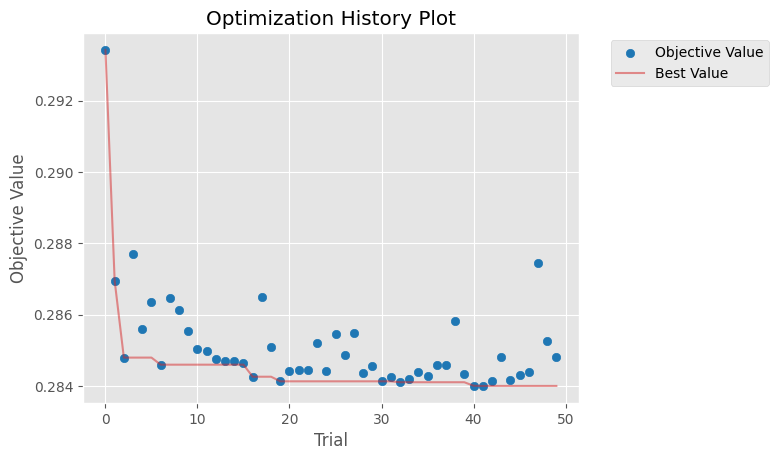

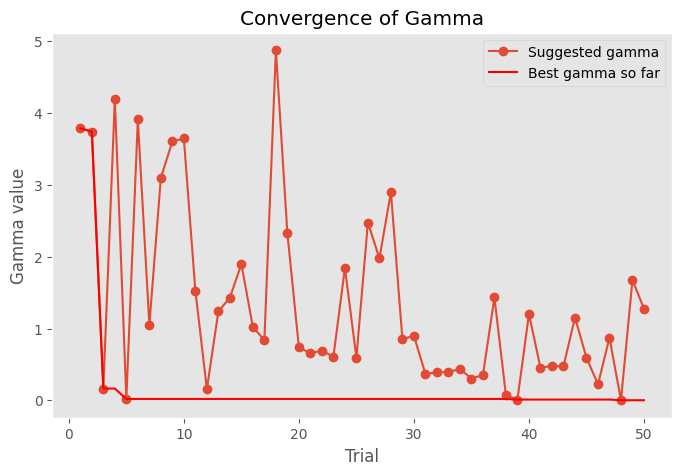

In [71]:
import optuna
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# 🟡 Define Objective Function for Optuna
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500, step=50),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 10),
    }

    # Train XGBoost Model
    model = xgb.XGBRegressor(**params, random_state=42)
    model.fit(X_train, y_train)

    # Predict & Compute RMSE
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return rmse

# 🔵 Run Optuna Optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)  # Try 50 different hyperparameter sets

# Get Best Hyperparameters
best_params = study.best_params
print(f"Best Hyperparameters: {best_params}")

# 🟢 Plot RMSE vs Hyperparameters
optuna.visualization.matplotlib.plot_param_importances(study)
plt.show()

optuna.visualization.matplotlib.plot_optimization_history(study)
plt.show()

# Extract gamma values over trials
gamma_values = [t.params["gamma"] for t in study.trials]
best_gamma = np.minimum.accumulate(gamma_values)

# Plot convergence of gamma
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(gamma_values) + 1), gamma_values, 'o-', label="Suggested gamma")
plt.plot(range(1, len(best_gamma) + 1), best_gamma, 'r-', label="Best gamma so far")
plt.xlabel("Trial")
plt.ylabel("Gamma value")
plt.title("Convergence of Gamma")
plt.legend()
plt.grid()
plt.show()



# LSTM

In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [73]:
df = pd.read_excel("CleanData/scaled_data.xlsx")  # Replace with actual file path

In [74]:
# Compute Energy Demand as sum of relevant columns
df["Energy Demand (kW)"] = df[
    ["Computer - kWatts", "Plug Load (kWatts)", "Air Conditioner-kWatts", "light + fan - kWatts "]
].sum(axis=1)

# Scale Energy Demand using Min-Max Scaling
scaler = MinMaxScaler(feature_range=(-1, 1))
df["Energy Demand"] = scaler.fit_transform(df[["Energy Demand (kW)"]])

In [75]:

# 🟢 Load Your Data (Assume 'df' is your DataFrame)
selected_features = ['testo 160 IAQ_51616142 [ppm]', 'testo 160 IAQ_51616142 [%RH]',]  # Replace with actual features
target = 'Energy Demand'  # Replace with actual target column

X = df[selected_features].values
y = df[target].values.reshape(-1, 1)

# 🔵 Scale Data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# 🔴 Convert to Sequential Format for LSTM (Timesteps = 10)
def create_sequences(X, y, time_steps=10):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 10  # Use past 10 observations
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# 🟡 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42, shuffle=False)

# Convert data to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.float32)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.float32)


In [76]:

# 🟣 Define LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size=50, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        return self.fc(lstm_out[:, -1, :])  # Use last time step output

# Instantiate model
input_size = X_train.shape[2]  # Number of features
LSTM_model = LSTMModel(input_size)

# Define loss & optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(LSTM_model.parameters(), lr=0.01)

# 🔵 Train the Model
epochs = 50
for epoch in range(epochs):
    LSTM_model.train()
    optimizer.zero_grad()
    y_pred = LSTM_model(X_train_torch)
    loss = criterion(y_pred, y_train_torch)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")


Epoch 0, Loss: 0.0611
Epoch 10, Loss: 0.0251
Epoch 20, Loss: 0.0248
Epoch 30, Loss: 0.0247
Epoch 40, Loss: 0.0245


In [77]:

# 🟠 Evaluate Model
LSTM_model.eval()
with torch.no_grad():
    y_pred_test = LSTM_model(X_test_torch)

# Convert predictions back to original scale
y_pred_rescaled = scaler_y.inverse_transform(y_pred_test)
y_test_rescaled = scaler_y.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))
print(f"LSTM RMSE: {rmse:.3f}")

LSTM RMSE: 0.188


LSTM RMSE: 0.186

In [78]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import optuna
from sklearn.metrics import mean_squared_error
from torch.utils.data import DataLoader, TensorDataset

# 🟢 Define LSTM Model with Tunable Hyperparameters
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        return self.fc(lstm_out[:, -1, :])  # Use last timestep

# 🟡 Objective Function for Hyperparameter Tuning
def objective(trial):
    hidden_size = trial.suggest_int("hidden_size", 32, 256, step=32)
    num_layers = trial.suggest_int("num_layers", 1, 3)
    dropout = trial.suggest_float("dropout", 0.1, 0.5, step=0.1)
    learning_rate = trial.suggest_float("lr", 0.001, 0.01, log=True)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])

    # 🔵 Prepare DataLoaders
    train_dataset = TensorDataset(X_train_torch, y_train_torch)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # 🔴 Initialize Model
    model = LSTMModel(input_size, hidden_size, num_layers, dropout)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # 🟠 Training Loop
    model.train()
    for epoch in range(30):  # Train for 30 epochs
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()

    # 🟢 Evaluate Model
    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_torch)
    
    # Calculate RMSE
    y_pred_rescaled = scaler_y.inverse_transform(y_pred_test.numpy())
    y_test_rescaled = scaler_y.inverse_transform(y_test_torch.numpy())
    rmse = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled))

    return rmse  # Optuna minimizes this

# 🔵 Run Optuna Hyperparameter Search
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

# 🔥 Print Best Hyperparameters
print(f"Best Hyperparameters: {study.best_params}")


[I 2025-05-02 18:20:38,339] A new study created in memory with name: no-name-8034c700-b00f-40c2-a927-b7f516a3eb5a
d:\Program Files\Python312\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "
[I 2025-05-02 18:21:07,751] Trial 0 finished with value: 0.20082542300224304 and parameters: {'hidden_size': 128, 'num_layers': 1, 'dropout': 0.1, 'lr': 0.0018002560550086214, 'batch_size': 64}. Best is trial 0 with value: 0.20082542300224304.
[I 2025-05-02 18:23:35,579] Trial 1 finished with value: 0.19345098733901978 and parameters: {'hidden_size': 224, 'num_layers': 2, 'dropout': 0.2, 'lr': 0.0027585974086618437, 'batch_size': 32}. Best is trial 1 with value: 0.19345098733901978.
d:\Program Files\Python312\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: drop

Best Hyperparameters: {'hidden_size': 160, 'num_layers': 3, 'dropout': 0.4, 'lr': 0.002553725865797346, 'batch_size': 32}


# SIMPLE ENSEMBLE 

In [79]:
# Load dataset
df = pd.read_excel("CleanData/scaled_data.xlsx")  # Replace with actual file path
# Compute Energy Demand as sum of relevant columns
df["Energy Demand (kW)"] = df[
    ["Computer - kWatts", "Plug Load (kWatts)", "Air Conditioner-kWatts", "light + fan - kWatts "]
].sum(axis=1)

# Scale Energy Demand using Min-Max Scaling
scaler = MinMaxScaler(feature_range=(-1, 1))
df["Energy Demand"] = scaler.fit_transform(df[["Energy Demand (kW)"]])


In [80]:
test = df['Energy Demand']
test = test[10:]

In [81]:

# 🟢 Load Your Data (Assume 'df' is your DataFrame)
selected_features = ['testo 160 IAQ_51616142 [ppm]', 'testo 160 IAQ_51616142 [%RH]',]  # Replace with actual features
target = 'Energy Demand'  # Replace with actual target column

X = df[selected_features].values
y = df[target].values.reshape(-1, 1)

# 🔵 Scale Data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# 🔴 Convert to Sequential Format for LSTM (Timesteps = 10)
def create_sequences(X, y, time_steps=10):
    X_seq, y_seq = [], []
    for i in range(len(X) - time_steps):
        X_seq.append(X[i:i + time_steps])
        y_seq.append(y[i + time_steps])
    return np.array(X_seq), np.array(y_seq)

time_steps = 10  # Use past 10 observations
X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps)

# 🟡 Train-Test Split
X_test, y_test = X_seq, y_seq



X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.float32)


In [82]:
LSTM_model.eval()
with torch.no_grad():
    y_pred_test = LSTM_model(X_test_torch)

# Convert predictions back to original scale
lstm_preds = scaler_y.inverse_transform(y_pred_test)



In [83]:

arima_preds = arma_result.forecast(steps=len(test))
arima_preds = arima_preds[-len(lstm_preds):]

In [84]:
import numpy as np
from sklearn.linear_model import Ridge

# Assuming you already have predictions
# arima_preds and lstm_preds should be numpy arrays of same length as y_test
# X_train, X_test, y_train, y_test are already defined

# Stack ARIMA and LSTM predictions
X_ensemble = np.column_stack((arima_preds, lstm_preds))



In [85]:
print(X_ensemble.shape, y_test.shape)
print(X_ensemble.shape, y_test.shape)


(15604, 2) (15604, 1)
(15604, 2) (15604, 1)


In [86]:

# Optimize weights using Ridge Regression
ridge = Ridge(alpha=1.0)  # Adjust alpha for regularization
ridge.fit(X_ensemble, y_test)
weights = ridge.coef_

# Compute final ensemble predictions
ensemble_preds = ridge.predict(X_ensemble)

print(f"Optimized Weights: ARIMA = {weights[0][0]:.3f}, LSTM = {weights[0][1]:.3f}")


Optimized Weights: ARIMA = 0.113, LSTM = 1.283


In [87]:
from sklearn.metrics import mean_squared_error  
import numpy as np  

# Compute final ensemble predictions  
ensemble_preds = ridge.predict(X_ensemble)

# Calculate RMSE  
rmse = np.sqrt(mean_squared_error(y_test, ensemble_preds))  
print(f"RMSE: {rmse:.3f}")  


RMSE: 0.144


RMSE Ensemble : 0.139

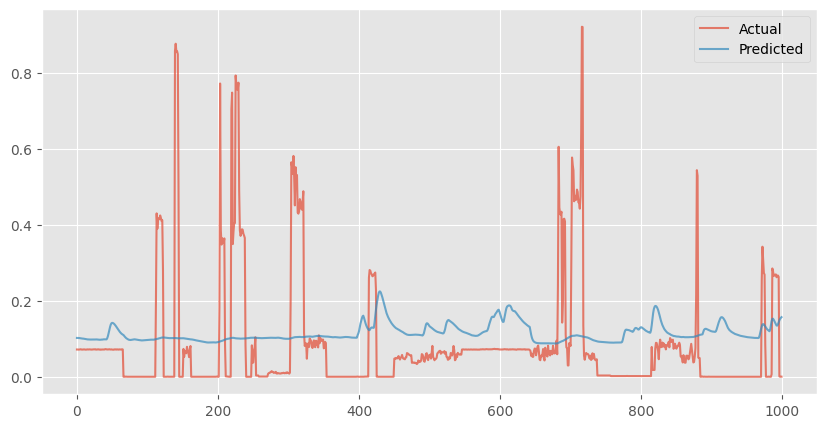

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test[500:1500], label="Actual", alpha=0.7)
plt.plot(ensemble_preds[500:1500], label="Predicted", alpha=0.7)
plt.legend()
plt.show()


# CLUSTERING